In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

import warnings

import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neural_network import MLPRegressor
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn.model_selection import KFold

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score


In [ ]:
def plot_smooth_ano(x, reg):
    y_pred_list = []
    print('teste: ',x[1])
    for i in range(85, 185):
   #     x[1] = np.log(i) 
    
        x = np.array(x).reshape(1,-1)
        x = scaler_X.transform(x)
    
        y_pred = reg.predict(x) #MLP
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1))
        print(y_pred)
        y_pred_list.append(y_pred)
        
    x_plot = x
    y_plot = np.exp(scaler_y.inverse_transform([y_pred_list]))

    plt.figure(figsize=(8, 8))
    plt.scatter(x_plot, y_plot)
    plt.xlabel('área construída')
    plt.ylabel('valores ajustados')

    plt.show()
    

    

***Carregando a base de dados***

In [2]:
data_aptos = pd.read_excel('data_aptos_final_missing_ok.xlsx')
data_aptos_num = data_aptos.select_dtypes(exclude='object')

data_aptos_num['brinq_salao_jogos'] = 0
data_aptos_num.loc[(data_aptos_num['brinquedoteca'] == 1) |
                  (data_aptos_num['salão de jogos'] == 1), ['brinq_salao_jogos']] = 1


In [3]:
data_aptos_num.drop(columns=['Unnamed: 0', 'index','data', 'Numero', 'idade do imóvel', 
                             'distancia_orla', 'andares', 'brinquedoteca', 'salão de jogos', 
                             'frente mar', 'gás encanado','central de gás', 'banheiros',
                             'varanda gourmet', 'espaço gourmet', 'mobiliado'], inplace=True)

In [102]:
(data_aptos_num.columns)

Index(['id', 'ano_oferta', 'área útil', 'quartos', 'vagas', 'suítes', 'campo',
       'churrasqueira', 'sala de ginástica', 'nascente', 'piscina',
       'playground', 'salão de festas', 'sauna', 'preco', 'PU', 'lat_bing',
       'lon_bing', 'distancia_orla_bing', 'ano_final', 'peso_rua_final',
       'avenida_boa_viagem', 'vias_principais', 'brinq_salao_jogos'],
      dtype='object')

In [5]:
X = data_aptos_num[['ano_oferta', 'área útil', 'quartos', 'vagas',
       'suítes', 'campo', 'churrasqueira', 
       'sala de ginástica', 'nascente', 'piscina', 'playground',
       'salão de festas', 'sauna', 'lat_bing', 'lon_bing',
       'distancia_orla_bing', 'ano_final', 'peso_rua_final',
       'avenida_boa_viagem', 'vias_principais', 'brinq_salao_jogos']].copy()

X['área útil'] = X['área útil'].apply(np.log)
X['peso_rua_final'] = X['peso_rua_final'].apply(np.log)
y = data_aptos_num[['preco']].apply(np.log)

In [ ]:
#X['preco'] = data_aptos_num['preco']
#X = X[X['preco'] <= 2000000].copy()
#y = X[['preco']].apply(np.log)
#X.drop(columns=['preco'], inplace=True)

In [105]:
X.columns

Index(['ano_oferta', 'área útil', 'quartos', 'vagas', 'suítes', 'campo',
       'churrasqueira', 'sala de ginástica', 'nascente', 'piscina',
       'playground', 'salão de festas', 'sauna', 'lat_bing', 'lon_bing',
       'distancia_orla_bing', 'ano_final', 'peso_rua_final',
       'avenida_boa_viagem', 'vias_principais', 'brinq_salao_jogos'],
      dtype='object')

***KBest features selection***

In [92]:
selector5 = SelectKBest(f_regression, k =5) 
selector5.fit(X, y['preco'])

selector7 = SelectKBest(f_regression, k =7)
selector7.fit(X, y['preco'])

selector10 = SelectKBest(f_regression, k =10)
selector10.fit(X, y['preco'])

selector14 = SelectKBest(f_regression, k =14)
selector14.fit(X, y['preco'])

selector15 = SelectKBest(f_regression, k =15)
selector15.fit(X, y['preco'])

selector16 = SelectKBest(f_regression, k =16)
selector16.fit(X, y['preco'])

selector17 = SelectKBest(f_regression, k =17)
selector17.fit(X, y['preco'])

selector18 = SelectKBest(f_regression, k =18)
selector18.fit(X, y['preco'])

selector19 = SelectKBest(f_regression, k =19)
selector19.fit(X, y['preco'])

selector20 = SelectKBest(f_regression, k =20)
selector20.fit(X, y['preco'])


SelectKBest(k=20, score_func=<function f_regression at 0x00000009FDE0D280>)

In [93]:
selecao_MI_5 = X.columns[(selector5.get_support()) == True]
selecao_MI_7 = X.columns[(selector7.get_support()) == True]
selecao_MI_10 = X.columns[(selector10.get_support()) == True]
selecao_MI_14 = X.columns[(selector14.get_support()) == True]
selecao_MI_15 = X.columns[(selector15.get_support()) == True]
selecao_MI_16 = X.columns[(selector16.get_support()) == True]
selecao_MI_17 = X.columns[(selector17.get_support()) == True]
selecao_MI_18 = X.columns[(selector18.get_support()) == True]
selecao_MI_19 = X.columns[(selector19.get_support()) == True]
selecao_MI_20 = X.columns[(selector20.get_support()) == True]


In [100]:
selecao_MI_17

Index(['ano_oferta', 'área útil', 'quartos', 'vagas', 'suítes', 'campo',
       'churrasqueira', 'piscina', 'playground', 'salão de festas', 'lat_bing',
       'lon_bing', 'distancia_orla_bing', 'ano_final', 'avenida_boa_viagem',
       'vias_principais', 'brinq_salao_jogos'],
      dtype='object')

***Basic feature selection - MLP REGRESSOR***

In [ ]:
models = []
models.append(('mlp5', MLPRegressor()))

In [98]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)

print(kf)

columns_str = [str(x) for x in X.columns]

selecao_str = [str(x) for x in selecao_MI_5] 
indices_5 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_7] 
indices_7 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_10] 
indices_10 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_14] 
indices_14 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_15] 
indices_15 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_16] 
indices_16 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_17] 
indices_17 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_18] 
indices_18 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_19] 
indices_19 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_MI_20] 
indices_20 = [columns_str.index(x) for x in selecao_str]

#indices_mlp = [columns_str.index(x) for x in selecao_mlp]


score_mlp_5 = []
score_mlp_7 = []
score_mlp_10 = []
score_mlp_14 = []
score_mlp_15 = []
score_mlp_16 = []
score_mlp_17 = []
score_mlp_18 = []
score_mlp_19 = []
score_mlp_20 = []
score_mlp_all = []
score_LR = []

seed = np.random.randint(1000)
run = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler_X = StandardScaler()
    scaler_X.fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)
    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_5], y_train.ravel())
    score_mlp_5.append(mlp.score(X_test[:, indices_5], y_test.ravel()))
    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_7], y_train.ravel())
    score_mlp_7.append(mlp.score(X_test[:, indices_7], y_test.ravel()))

    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_10], y_train.ravel())
    score_mlp_10.append(mlp.score(X_test[:, indices_10], y_test.ravel()))
    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_14], y_train.ravel())
    score_mlp_14.append(mlp.score(X_test[:, indices_14], y_test.ravel()))


    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_15], y_train.ravel())
    score_mlp_15.append(mlp.score(X_test[:, indices_15], y_test.ravel()))

    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_16], y_train.ravel())
    score_mlp_16.append(mlp.score(X_test[:, indices_16], y_test.ravel()))

    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_17], y_train.ravel())
    score_mlp_17.append(mlp.score(X_test[:, indices_17], y_test.ravel()))
    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_18], y_train.ravel())
    score_mlp_18.append(mlp.score(X_test[:, indices_18], y_test.ravel()))
    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_19], y_train.ravel())
    score_mlp_19.append(mlp.score(X_test[:, indices_19], y_test.ravel()))

    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train[:, indices_20], y_train.ravel())
    score_mlp_20.append(mlp.score(X_test[:, indices_20], y_test.ravel()))
    
    mlp = MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01, random_state=seed).fit(X_train, y_train.ravel())
    score_mlp_all.append(mlp.score(X_test, y_test.ravel()))
    
#    lr = LinearRegression().fit(X_train[:, indices_15], y_train.ravel())
#    score_LR.append(lr.score(X_test[:, indices_15], y_test.ravel()))


    
    print(run)
    run = run + 1
    
print("### RESULTADOS: ####")
print('Média / desvio padrão - 10-fold')

print('5: ', np.mean(score_mlp_5).round(4), np.std(score_mlp_5).round(4))
print('10: ',np.mean(score_mlp_10).round(4), np.std(score_mlp_10).round(4))
print('14: ',np.mean(score_mlp_14).round(4), np.std(score_mlp_14).round(4))
print('15: ',np.mean(score_mlp_15).round(4), np.std(score_mlp_15).round(4))
print('16: ',np.mean(score_mlp_16).round(4), np.std(score_mlp_16).round(4))
print('17: ',np.mean(score_mlp_17).round(4), np.std(score_mlp_17).round(4))
print('18: ',np.mean(score_mlp_18).round(4), np.std(score_mlp_18).round(4))
print('19: ',np.mean(score_mlp_19).round(4), np.std(score_mlp_19).round(4))
print('20: ',np.mean(score_mlp_20).round(4), np.std(score_mlp_20).round(4))
print('mlp_all: ',np.mean(score_mlp_all).round(4), np.std(score_mlp_all).round(4))


KFold(n_splits=10, random_state=None, shuffle=True)
1
2
3
4
5
6
7
8
9
10
### RESULTADOS: ####
Média / desvio padrão - 10-fold
5:  0.8222 0.0236
10:  0.8437 0.0234
14:  0.8507 0.0172
15:  0.8582 0.017
16:  0.8532 0.0204
17:  0.9005 0.0177
18:  0.8999 0.0169
19:  0.8954 0.02
20:  0.8983 0.0183
mlp_all:  0.8957 0.02


MLP TUNNING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selecao_MI_17], y, test_size=0.1, 
                                                    random_state=np.random.randint(1000))

scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

In [172]:
hidden_layer_sizes=[(25,), (50,), (100,)]
max_iter=[500, 600] 
validation_fraction=[0.1, 0.25]
early_stopping=[True]
learning_rate_init=[0.01, 0.001]
batch_size = [200, 500]

random_grid = {'hidden_layer_sizes': hidden_layer_sizes,
              'max_iter': max_iter,
              'validation_fraction': validation_fraction,
              'early_stopping': early_stopping,
              'learning_rate_init': learning_rate_init,
              'batch_size': batch_size}

In [173]:

print('seed:', seed)
mlp = MLPRegressor(random_state=0)

mlp_search = GridSearchCV(estimator = mlp, param_grid=random_grid, 
                          verbose=2, n_jobs = -1, scoring='neg_mean_squared_error')

seed: 902


In [174]:
mlp_search.fit(np.array(X[selecao_MI_17]), np.array(y).ravel())
mlp_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'batch_size': 200,
 'early_stopping': True,
 'hidden_layer_sizes': (50,),
 'learning_rate_init': 0.01,
 'max_iter': 500,
 'validation_fraction': 0.1}

VALIDAÇÃO DO MLP TUNNING

In [179]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)

print(kf)

columns_str = [str(x) for x in X.columns]

selecao_str = [str(x) for x in selecao_MI_17] 
indices_17 = [columns_str.index(x) for x in selecao_str]

score_mlp_17_100_neuronios = []
score_mlp_17_50_neuronios = []

seed = np.random.randint(1000)
run = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler_X = StandardScaler()
    scaler_X.fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)
    
    mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, early_stopping=True, learning_rate_init=0.01,
                       validation_fraction=0.1, random_state=seed).fit(X_train[:, indices_17], y_train.ravel())
    score_mlp_17_100_neuronios.append(mlp.score(X_test[:, indices_17], y_test.ravel()))

    mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1500, early_stopping=True, learning_rate_init=0.001,
                       validation_fraction=0.1, random_state=seed).fit(X_train[:, indices_17], y_train.ravel())
    score_mlp_17_50_neuronios.append(mlp.score(X_test[:, indices_17], y_test.ravel()))

    
    print(run)
    run = run + 1
    
print("### RESULTADOS: ####")
print('Média / desvio padrão - 10-fold')

print('17 (100,): ',np.mean(score_mlp_17_100_neuronios).round(4), np.std(score_mlp_17_100_neuronios).round(4))
print('17 (50,): ',np.mean(score_mlp_17_50_neuronios).round(4), np.std(score_mlp_17_50_neuronios).round(4))


KFold(n_splits=10, random_state=None, shuffle=True)
1
2
3
4
5
6
7
8
9
10
### RESULTADOS: ####
Média / desvio padrão - 10-fold
17 (100,):  0.8955 0.015
17 (50,):  0.8986 0.0172


***Seleção via MLP (não utilizado)***

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)
X_sel = scaler_X.transform(X)

scaler_y = StandardScaler()
scaler_y.fit(y)
y_sel = scaler_y.transform(y)

sfs_selector = SequentialFeatureSelector(estimator=MLPRegressor(max_iter=500, early_stopping=True, learning_rate_init=0.01), n_features_to_select = 'auto', cv=5, direction ='backward')
sfs_selector.fit(X_sel, y_sel.ravel())

selecao_mlp = X.columns[(sfs_selector.get_support()) == True].tolist()
print(selecao_mlp)

#resultado backward - mlp:
# ['ano_oferta', 'área útil', 'vagas', 'churrasqueira', 'espaço gourmet', 'central de gás', 'mobiliado', 'playground', 'salão de jogos', 'sauna', 'varanda gourmet', 'lon_bing', 'distancia_orla_bing', 'ano_final', 'avenida_boa_viagem']

***Seleção atributos regressão linear***

In [190]:
sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), 
                                         n_features_to_select = 'auto', 
                                         cv=10, direction ='forward', tol=0.0)
sfs_selector.fit(X, y)
selecao_lr = X.columns[(sfs_selector.get_support()) == True].tolist()
print(selecao_lr)
print('size:', len(selecao_lr))

['ano_oferta', 'área útil', 'vagas', 'suítes', 'sala de ginástica', 'lat_bing', 'lon_bing', 'distancia_orla_bing', 'ano_final', 'avenida_boa_viagem']
size: 10


In [80]:
len(selecao_lr)

10

### COMPARANDO MODELOS

***MLP, GBM-R, Linear Regression, CART***

In [252]:
seed = 1 #np.random.randint(1000)

kf = KFold(n_splits=10, shuffle=True, random_state=seed)
kf.get_n_splits(X)

print(kf)

columns_str = [str(x) for x in X.columns]

selecao_str = [str(x) for x in selecao_MI_15] 
indices_15 = [columns_str.index(x) for x in selecao_str]

selecao_str = [str(x) for x in selecao_lr] 
indices_lr = [columns_str.index(x) for x in selecao_str]



#indices_mlp = [columns_str.index(x) for x in selecao_mlp]

score_mlp_15 = []
score_mlp_17 = []
score_gbr = []
score_gbr2 = []
score_LR = []
score_cart = []
score_bagging = []
score_bagging_tree = []
score_RF = []


run = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler_X = StandardScaler()
    scaler_X.fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)
    

 #   mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=600, early_stopping=True, learning_rate_init=0.01, 
 #                      random_state=seed).fit(X_train[:, indices_15], y_train.ravel())
 #   score_mlp_15.append(mlp.score(X_test[:, indices_15], y_test.ravel()))
 #   print('mlp 15: ', mlp.score(X_test[:, indices_15], y_test.ravel()))
    
    mlp_17 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=600, early_stopping=True, learning_rate_init=0.01, 
                          activation='relu',random_state=seed, validation_fraction=0.1).fit(X_train[:, indices_17], y_train.ravel())
    score_mlp_17.append(mlp_17.score(X_test[:, indices_17], y_test.ravel()))
    print('mlp 17: ', mlp_17.score(X_test[:, indices_17], y_test.ravel()))

    
#    mlp_to_bag = MLPRegressor(max_iter=500, early_stopping=False, learning_rate_init=0.01, random_state=seed)
    
#    mlp_bag = BaggingRegressor(base_estimator=mlp_to_bag, n_estimators=5, random_state=None).fit(X_train[:, indices_17], y_train.ravel())
#    score_bagging.append(mlp_bag.score(X_test[:, indices_17], y_test.ravel()))
#    print('mlp_bag: ',mlp_bag.score(X_test[:, indices_17], y_test.ravel()))


#    cart = tree.DecisionTreeRegressor(min_samples_leaf=10, max_depth=10).fit(X_train, y_train.ravel())
  #  cart = tree.DecisionTreeRegressor().fit(X_train, y_train.ravel())
  #  score_cart.append(cart.score(X_test, y_test.ravel()))
  #  print('CART: ', cart.score(X_test, y_test.ravel()))
    
 #   cart_bag = BaggingRegressor(base_estimator=cart, n_estimators=99, random_state=None).fit(X_train, y_train.ravel())
 #   score_bagging_tree.append(cart_bag.score(X_test, y_test.ravel()))
 #   print('CART_bag: ', cart_bag.score(X_test, y_test.ravel()))
    
    rf = RandomForestRegressor(n_estimators=300, random_state=seed).fit(X_train, y_train.ravel())
    score_RF.append(rf.score(X_test, y_test.ravel()))
    print('rf: ', rf.score(X_test, y_test.ravel()))
    

        
    lr = LinearRegression().fit(X_train[:, indices_lr], y_train.ravel())
    score_LR.append(lr.score(X_test[:, indices_lr], y_test.ravel()))
    print('lr 15: ', lr.score(X_test[:, indices_lr], y_test.ravel()))
    
    
    params = {
        "n_estimators": 2000,
        "max_depth": 4,
        "min_samples_split": 2,#20,
        'min_samples_leaf': 1, #default = 1; best=20
        "learning_rate": 0.01,
        "loss": "squared_error",
        'subsample': 0.7,
        }

    reg = GradientBoostingRegressor(**params, random_state=seed).fit(X_train, y_train.ravel())
    score_gbr.append(reg.score(X_test, y_test.ravel()))
    print('GBM: ', reg.score(X_test, y_test.ravel()))

    params2 = {
        "n_estimators": 200,#3000,
        "max_depth": 4,
        "min_samples_split": 2,
        'min_samples_leaf': 1, #default = 1
        "learning_rate": 0.1, #boa 0.01 com 2000 ou 3000 árvores
        "loss": "squared_error",
        'subsample': 1,
        }

 #   reg2 = GradientBoostingRegressor(**params2).fit(X_train, y_train.ravel())
 #   score_gbr2.append(reg2.score(X_test, y_test.ravel()))
 #   print('GBM2: ', reg2.score(X_test, y_test.ravel()))
    
    print(run)
    print()
    run = run + 1
    
    
print("### RESULTADOS: ###")

#print('mlp_15: ',np.mean(score_mlp_15), np.std(score_mlp_15))
print('mlp_17: ',np.mean(score_mlp_17).round(4), np.std(score_mlp_17).round(4))
#print('mlp_bag: ', np.mean(score_bagging), np.std(score_bagging))
print('RF: ', np.mean(score_RF).round(4), np.std(score_RF).round(4))
#print('CART: ', np.mean(score_cart), np.std(score_cart))
#print('CART_bag: ', np.mean(score_bagging_tree), np.std(score_cart))
print('LR_15: ', np.mean(score_LR).round(4), np.std(score_LR).round(4))
print('GBM: ', np.mean(score_gbr).round(4), np.std(score_gbr).round(4))
#print('GBM2: ', np.mean(score_gbr2), np.std(score_gbr2))



KFold(n_splits=10, random_state=1, shuffle=True)
mlp 17:  0.8892942512143722
rf:  0.9150242339130581
lr 15:  0.869232438215755
GBM:  0.9006761786337341
1

mlp 17:  0.9086359652128052
rf:  0.8954787937008537
lr 15:  0.9038718955350719
GBM:  0.9141056349912484
2

mlp 17:  0.8890624860619482
rf:  0.8877719112982688
lr 15:  0.8707588157034623
GBM:  0.9127405432866113
3

mlp 17:  0.91426748153527
rf:  0.9064067528401385
lr 15:  0.9077571370971276
GBM:  0.9313969987645658
4

mlp 17:  0.9195671089824349
rf:  0.9279916482299363
lr 15:  0.9123428430669124
GBM:  0.9336153776870412
5

mlp 17:  0.9026355739585203
rf:  0.9145350604952494
lr 15:  0.8930376073013767
GBM:  0.9246780787893253
6

mlp 17:  0.9035486799523986
rf:  0.9091368898141841
lr 15:  0.8873438797181672
GBM:  0.9188489678500942
7

mlp 17:  0.8749086776303937
rf:  0.9126280973304476
lr 15:  0.8686374987220264
GBM:  0.921103314244875
8

mlp 17:  0.9064940456084527
rf:  0.9009033427529312
lr 15:  0.8998688810704469
GBM:  0.902690502707

In [294]:
print(np.median(data_aptos_num['lat_bing']), np.median(data_aptos_num['lon_bing']))

-8.1221278 -34.9003993


In [297]:

#teste inferência
ano_oferta = 2022
area = 85 #np.mean(data_aptos_num['área útil']) #mario: 85
quartos = int(np.mean(data_aptos_num['quartos']))#3
vagas = int(np.mean(data_aptos_num['vagas']))#2
suites = int(np.mean(data_aptos_num['suítes'])) # 1
campo = 0
churrasqueira = 1 #1
sala_ginastica = 0
nascente = 0
piscina = 0
playground = 0
salao_festas = 0
sauna = 0
lat_bing =  np.median(data_aptos_num['lat_bing']) #-8.1415356769
lon_bing = np.median(data_aptos_num['lat_bing']) #-34.90978355
distancia_orla_bing = 439
ano_final = 2006 #mediana dos anos: 2006
peso_rua_final = np.log(132)
avenida_boa_viagem = 0
vias_principais = 0
brinq_salao_jogos = 0

In [298]:
np.mean(data_aptos_num['área útil'])

127.42941852117731

[2022, 85, 3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, -8.1221278, -8.1221278, 439, 2006, 4.882801922586371, 0, 0, 0]
apto mário:
mlp: 8.18979173227752e+54
lr: 2.48475e-318
RF: 621238.3519953252
GBM: 866460.7304624942


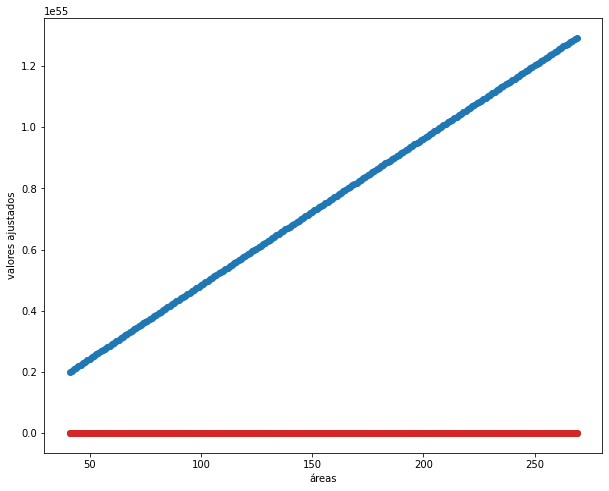

In [303]:
#reg = cart_bag
# anos 2016 e 2018
warnings.filterwarnings("ignore")

min = np.percentile(X['área útil'], 5)#np.median(X['área útil'])
min = int(np.exp(min))
#min = int(min)

max = np.percentile(X['área útil'], 95)
max = int(np.exp(max))
#max = int(max)

x_plot = [i for i in range(min, max)]

dado_teste = [ano_oferta, area, quartos,vagas, suites, campo, churrasqueira, 
         sala_ginastica, nascente, piscina, 
         playground, salao_festas, sauna, lat_bing, lon_bing, 
         distancia_orla_bing, ano_final, peso_rua_final, 
         avenida_boa_viagem, vias_principais, brinq_salao_jogos]

print(dado_teste)

#teste = [2022, np.log(85), 3, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, -8.1179193, -34.894645, 50, 2016, 69, 0, 0]
#mario = teste

y_plot_mlp = []
y_plot_lr = []
y_plot_rf = []
y_plot_gbm = []



for i in x_plot:
    
    dado_teste[1] = np.log(i)    
    #dado_teste[1] = i    
    #dado_teste[18] = i    

    dado_teste_t = np.array(dado_teste).reshape(1,-1)

    dado_teste_t = scaler_X.transform(dado_teste_t)

    y_rf = rf.predict(dado_teste_t) #REGRESSOR
    y_gbm = reg.predict(dado_teste_t) #REGRESSOR
    
    dado_teste_mlp = dado_teste_t[0][indices_17].reshape(1,-1)    
    y_mlp = mlp_17.predict(dado_teste_mlp) #REGRESSOR
    
    dado_teste_lr = dado_teste_t[0][indices_lr].reshape(1,-1)
    y_lr = lr.predict(dado_teste_lr) #REGRESSOR
    #y_rf = (y_mlp + y_lr + y_gbm)/3 #REGRESSOR    
    
    y_mlp = scaler_y.inverse_transform(y_mlp.reshape(-1,1))
    y_lr = scaler_y.inverse_transform(y_lr.reshape(-1,1))
    y_rf = scaler_y.inverse_transform(y_rf.reshape(-1,1))
    y_gbm = scaler_y.inverse_transform(y_gbm.reshape(-1,1))
    
    
    y_plot_mlp.append(np.exp(y_mlp)[0][0])
    y_plot_lr.append(np.exp(y_lr)[0][0])
    y_plot_rf.append(np.exp(y_rf)[0][0])
    y_plot_gbm.append(np.exp(y_gbm)[0][0])
    
#    y_plot_mlp.append((y_mlp)[0][0])
#    y_plot_lr.append((y_lr)[0][0])
#    y_plot_rf.append((y_rf)[0][0])
#    y_plot_gbm.append((y_gbm)[0][0])

    
    if i == 170:
        print('apto mário:')
        print('mlp:',np.exp(y_mlp)[0][0])
        print('lr:',np.exp(y_lr)[0][0])
        print('RF:',np.exp(y_rf)[0][0])
        print('GBM:',np.exp(y_gbm)[0][0])

#        print('mlp:',(y_mlp)[0][0])
#        print('lr:',(y_lr)[0][0])
#        print('RF:',(y_rf)[0][0])
#        print('GBM:',(y_gbm)[0][0])


plt.figure(figsize=(10, 8))
plt.scatter(x_plot, y_plot_mlp)
plt.scatter(x_plot, y_plot_lr)
plt.scatter(x_plot, y_plot_rf)
plt.scatter(x_plot, y_plot_gbm)
plt.xlabel('áreas')
plt.ylabel('valores ajustados')

plt.show()

Text(0.5, 0, 'Gradient Boosting Regression Feature Importance')

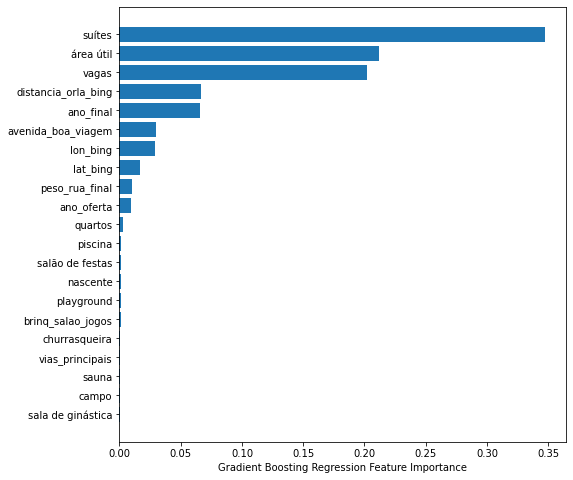

In [253]:
gbr = reg
sorted_idx = gbr.feature_importances_.argsort()
plt.figure(figsize=(8, 8))
plt.barh(X.columns[sorted_idx], gbr.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Regression Feature Importance")

MLP scatterplot

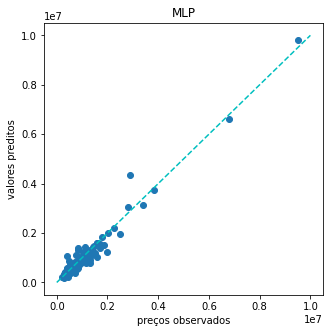

In [290]:
x_plot = np.exp(scaler_y.inverse_transform(y_test))

y_pred_test = (mlp_17.predict(X_test[:,indices_17]))
y_plot = np.exp(scaler_y.inverse_transform([y_pred_test]))

plt.figure(figsize=(5, 5))
plt.scatter(x_plot, y_plot)
plt.xlabel('preços observados')
plt.ylabel('valores preditos')
x = [x for x in range(10000000)]
plt.plot(x, x, '--c')
plt.title('MLP')
plt.show()
x = 0

Random Forest scatterplot

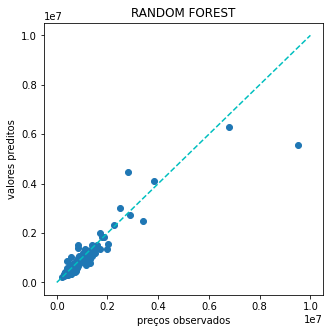

In [291]:
x_plot = np.exp(scaler_y.inverse_transform(y_test))

y_pred_test = (rf.predict(X_test))
y_plot = np.exp(scaler_y.inverse_transform([y_pred_test]))

plt.figure(figsize=(5, 5))
plt.scatter(x_plot, y_plot)
plt.xlabel('preços observados')
plt.ylabel('valores preditos')
x = [x for x in range(10000000)]
plt.plot(x, x, '--c')
plt.title('RANDOM FOREST')
plt.show()
x = 0

GBM Scatterplot

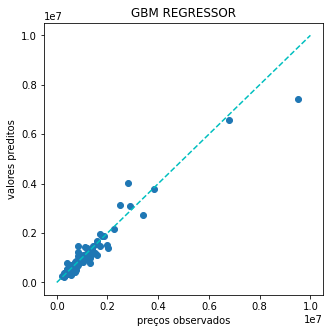

In [292]:
x_plot = np.exp(scaler_y.inverse_transform(y_test))

y_pred_test = (reg.predict(X_test))
y_plot = np.exp(scaler_y.inverse_transform([y_pred_test]))

plt.figure(figsize=(5, 5))
plt.scatter(x_plot, y_plot)
plt.xlabel('preços observados')
plt.ylabel('valores preditos')
x = [x for x in range(10000000)]
plt.plot(x, x, '--c')
plt.title('GBM REGRESSOR')
plt.show()
x = 0

#### TUNNING GBM

In [239]:
n_estimators = [1000, 2000]
learning_rate = [0.1, 0.01, 0.001]
subsample = [0.7, 1]
max_depth = [3, 4, 5]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 5, 10] #default = 1

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'subsample': subsample,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
              }


In [240]:
seed = random_state=np.random.randint(1000)

gbr = GradientBoostingRegressor(loss = "squared_error")
gbr_search = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, 
                                n_iter = 50, cv = 5, verbose=3, random_state=seed, 
                                n_jobs = -1, scoring='r2')

gbr_search.fit(np.array(X), np.array(y).ravel())
gbr_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'subsample': 0.7,
 'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'learning_rate': 0.01}

In [ ]:
gbr_search.best_params_

In [ ]:
reg = GradientBoostingRegressor(**gbr_search.best_params_).fit(X_train, y_train['preco'])
reg.score(X_test, y_test['preco'])


In [ ]:
y_pred_test = gbr_search.predict(X_test)

print(gbr_search.score(X_train, y_train))
print(gbr_search.score(X_test, y_test))

In [ ]:
x_plot = np.exp(scaler_y.inverse_transform(y_test))
y_pred_test = gbr_search.predict(X_test)
y_plot = np.exp(scaler_y.inverse_transform([y_pred_test]))

plt.figure(figsize=(8, 8))
plt.scatter(x_plot, y_plot)
plt.xlabel('valores observados')
plt.ylabel('valores ajustados')

plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

np.array(y).ravel()